In [24]:
import pandas as pd
df=pd.read_csv("datasets/students.csv")
df

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,27d7e5aa-dc11-40a7-9aff-586f00f8d55b,Anil,19.0,Male,IT,7.69,2.0,92.45,"Cultural Club, Robotics, Entrepreneurship Cell","Java, Web Development, C++, SQL, Data Science",...,0.00,NaN,7.00,7.76,8.93,7.41,7.57,7.15,8.17,7.53
1996,74f43a77-70a1-4e4c-a0c2-460d939618c9,Ramya,23.0,Female,CIVIL,7.25,0.0,96.35,"Entrepreneurship Cell, Literary Society","SQL, Machine Learning, Data Science, Java",...,0.00,NaN,7.36,7.55,6.75,6.36,7.07,5.91,8.10,8.87
1997,88a613b4-a3b8-4f92-a3c9-0c6a86017633,Gregory Fernandez,18.0,Male,EEE,6.92,0.0,75.32,"Literary Society, Sports Club","Web Development, Data Science, SQL",...,0.00,NaN,5.12,5.48,6.98,7.29,7.48,6.70,9.53,6.77
1998,248c7b65-0c61-4277-9e95-44857b54d1a9,Vikram,22.0,Male,CSE,7.09,0.0,94.20,"Entrepreneurship Cell, Cultural Club, Sports Club","Data Science, C++, SQL, Python, Java",...,8.89,Job,8.39,7.11,8.32,5.64,6.56,6.71,6.89,7.08


In [25]:

df = df[df['Student ID'].notnull()]

# Fill single missing values with suitable replacements
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Branch'].fillna(df['Branch'].mode()[0], inplace=True)
df['Average GPA'].fillna(df[['Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA', 'Sem4 GPA',
                             'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA']].mean(axis=1), inplace=True)
df['Backlogs'].fillna(0, inplace=True)
df['Attendance (%)'].fillna(df['Attendance (%)'].mean(), inplace=True)
df['Clubs'].fillna('None', inplace=True)
df['Skills'].fillna('None', inplace=True)
df['Internship Done'].fillna('No', inplace=True)
df['Placement Status'].fillna('Not Placed', inplace=True)
df['CTC (LPA)'].fillna(0, inplace=True)

# Fill semester GPAs with row-wise mean if missing
for col in [f'Sem{i} GPA' for i in range(1, 9)]:
    df[col].fillna(df[col].mean(), inplace=True)

# High-null columns: use 'Not Available' or drop
df['Internship Domain'].fillna('Not Available', inplace=True)
df['Placement Domain'].fillna('Not Available', inplace=True)
df['Alumni Path'].fillna('Not Available', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_23404\1138009279.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23404\1138009279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Loc

In [26]:
df.isnull().sum()

Student ID           0
Name                 0
Age                  0
Gender               0
Branch               0
Average GPA          0
Backlogs             0
Attendance (%)       0
Clubs                0
Skills               0
Internship Done      0
Internship Domain    0
Placement Status     0
Placement Domain     0
CTC (LPA)            0
Alumni Path          0
Sem1 GPA             0
Sem2 GPA             0
Sem3 GPA             0
Sem4 GPA             0
Sem5 GPA             0
Sem6 GPA             0
Sem7 GPA             0
Sem8 GPA             0
dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

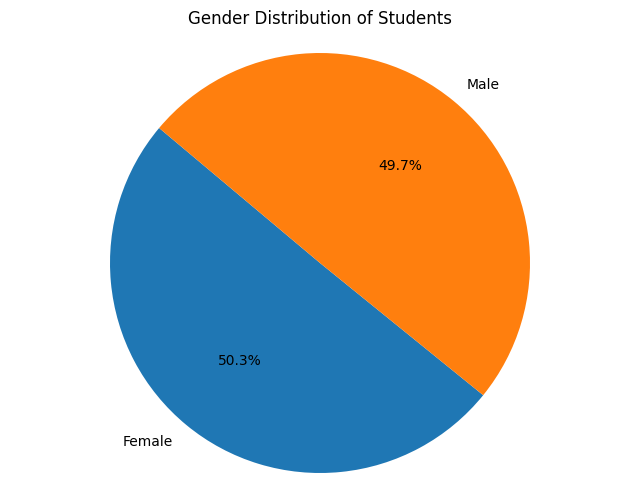

<Figure size 640x480 with 0 Axes>

In [28]:
'''1. Gender Distribution
Chart: Pie or Bar Chart

Purpose: Show gender imbalance (if any)'''
# Gender Distribution
gender_counts = df['Gender'].value_counts()

# Plotting the gender distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()
plt.savefig("analysis/gender_distribution.png")

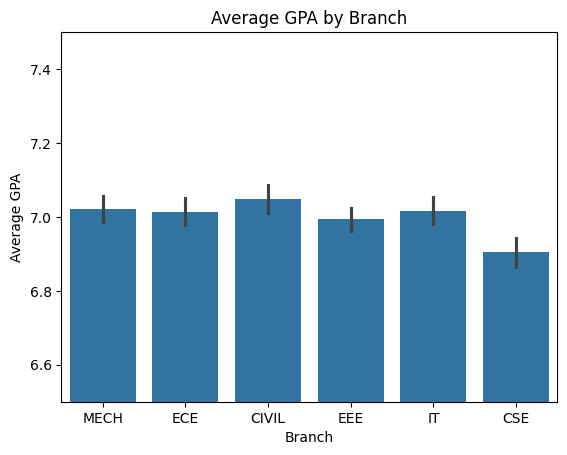

<Figure size 640x480 with 0 Axes>

In [29]:
sns.barplot(x='Branch', y='Average GPA', data=df)
plt.title('Average GPA by Branch')
plt.xlabel('Branch')
plt.ylabel('Average GPA')
plt.ylim(6.5, 7.5)  # Set the y-axis scale
plt.show()
plt.savefig("analysis/average_gpa_by_branch.png")

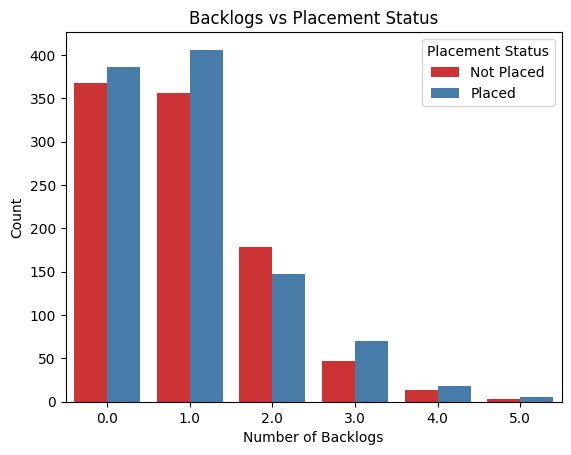

<Figure size 640x480 with 0 Axes>

In [30]:
sns.countplot(x='Backlogs', hue='Placement Status', data=df, palette='Set1')
#save the image
plt.title('Backlogs vs Placement Status')
plt.xlabel('Number of Backlogs')
plt.ylabel('Count')
plt.legend(title='Placement Status')
plt.show()
plt.savefig("analysis/backlogs_vs_placement_status.png")

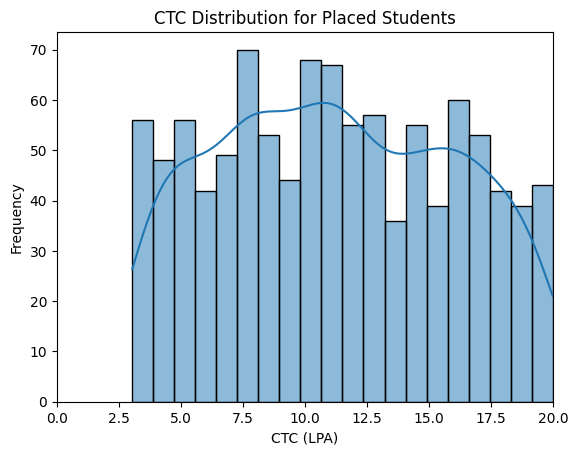

<Figure size 640x480 with 0 Axes>

In [31]:
sns.histplot(df[df['Placement Status']=='Placed']['CTC (LPA)'], bins=20, kde=True)
#save the image
plt.title('CTC Distribution for Placed Students')
plt.xlabel('CTC (LPA)')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Limit x-axis to a reasonable range
plt.show()
plt.savefig("analysis/ctc_distribution_placed_students.png")

In [32]:
df['Placed'] = df['Placement Status'].map({'Placed': 1, 'Not Placed': 0})
df['Placed']

C:\Users\HP\AppData\Local\Temp\ipykernel_23404\1509152431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Placed'] = df['Placement Status'].map({'Placed': 1, 'Not Placed': 0})


0       0
1       0
2       0
3       1
4       0
       ..
1995    0
1996    0
1997    0
1998    1
1999    0
Name: Placed, Length: 1999, dtype: int64

In [33]:
features = [
    'Age', 'Gender', 'Branch', 'Average GPA', 'Backlogs', 'Attendance (%)',
    'Skills', 'Internship Done', 'Clubs'
]


In [34]:
from collections import defaultdict

skill_freq = defaultdict(int)

for skills in df[df['Placed'] == 1]['Skills']:
    for skill in str(skills).split(','):
        skill = skill.strip().lower()
        skill_freq[skill] += 1
skill_freq

defaultdict(int,
            {'python': 525,
             'sql': 530,
             'java': 561,
             'c++': 462,
             'web development': 570,
             'machine learning': 490,
             'data science': 514})

In [35]:
max_score = max(skill_freq.values())
skill_score_map = {skill: score / max_score for skill, score in skill_freq.items()}
skill_score_map

{'python': 0.9210526315789473,
 'sql': 0.9298245614035088,
 'java': 0.9842105263157894,
 'c++': 0.8105263157894737,
 'web development': 1.0,
 'machine learning': 0.8596491228070176,
 'data science': 0.9017543859649123}

In [36]:
def compute_skill_score(skill_str):
    if pd.isna(skill_str):
        return 0
    score = 0
    for skill in skill_str.split(','):
        skill = skill.strip().lower()
        score += skill_score_map.get(skill, 0.1)  # default low score if unseen
    return score
df['Skill Score'] = df['Skills'].apply(compute_skill_score)


C:\Users\HP\AppData\Local\Temp\ipykernel_23404\2396882423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skill Score'] = df['Skills'].apply(compute_skill_score)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

df['Skill Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))

# Label encoding for categorical variables
le = LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Branch'] = le2.fit_transform(df['Branch'])
df['Internship Done'] = le3.fit_transform(df['Internship Done'])
df['Clubs'] = le4.fit_transform(df['Clubs'])



# Select features
X = df[['Gender', 'Branch', 'Average GPA', 'Backlogs', 'Attendance (%)', 'Skill Score', 'Internship Done', 'Clubs']]
y = df['Placed']




C:\Users\HP\AppData\Local\Temp\ipykernel_23404\551051579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skill Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))
C:\Users\HP\AppData\Local\Temp\ipykernel_23404\551051579.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
C:\Users\HP\AppData\Local\Temp\ipykernel_23404\551051579.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=200,min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       227
           1       0.86      0.85      0.85       273

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [39]:
model.score(X_test, y_test)

0.84

In [40]:
model.predict_proba(X_test)[:, 1]

array([0.89 , 0.565, 0.83 , 0.77 , 0.185, 0.075, 0.935, 0.07 , 0.745,
       0.2  , 0.36 , 0.435, 0.   , 0.36 , 0.31 , 0.8  , 0.335, 0.535,
       0.34 , 0.805, 0.115, 0.145, 0.34 , 0.26 , 0.445, 0.155, 0.44 ,
       0.42 , 0.075, 0.565, 0.84 , 0.56 , 0.905, 0.96 , 0.89 , 0.58 ,
       0.32 , 0.765, 0.775, 0.835, 0.565, 0.965, 0.57 , 0.625, 0.41 ,
       0.1  , 0.78 , 0.585, 0.33 , 0.735, 0.745, 0.155, 0.305, 0.135,
       0.765, 0.59 , 0.525, 0.77 , 0.805, 0.135, 0.34 , 0.405, 0.24 ,
       0.585, 0.72 , 0.57 , 0.44 , 0.61 , 0.365, 0.52 , 0.605, 0.615,
       0.81 , 0.165, 0.32 , 0.27 , 0.835, 0.81 , 0.09 , 0.28 , 0.925,
       0.335, 0.88 , 0.285, 0.865, 0.375, 0.775, 0.785, 0.545, 0.48 ,
       0.285, 0.495, 0.95 , 0.38 , 0.305, 0.41 , 0.595, 0.01 , 0.165,
       0.505, 0.37 , 0.535, 0.09 , 0.935, 0.58 , 0.47 , 0.27 , 0.065,
       0.635, 0.975, 0.79 , 0.2  , 0.675, 0.115, 0.455, 0.875, 0.39 ,
       0.23 , 0.125, 0.48 , 0.325, 0.21 , 0.69 , 0.5  , 0.04 , 0.03 ,
       0.395, 0.675,

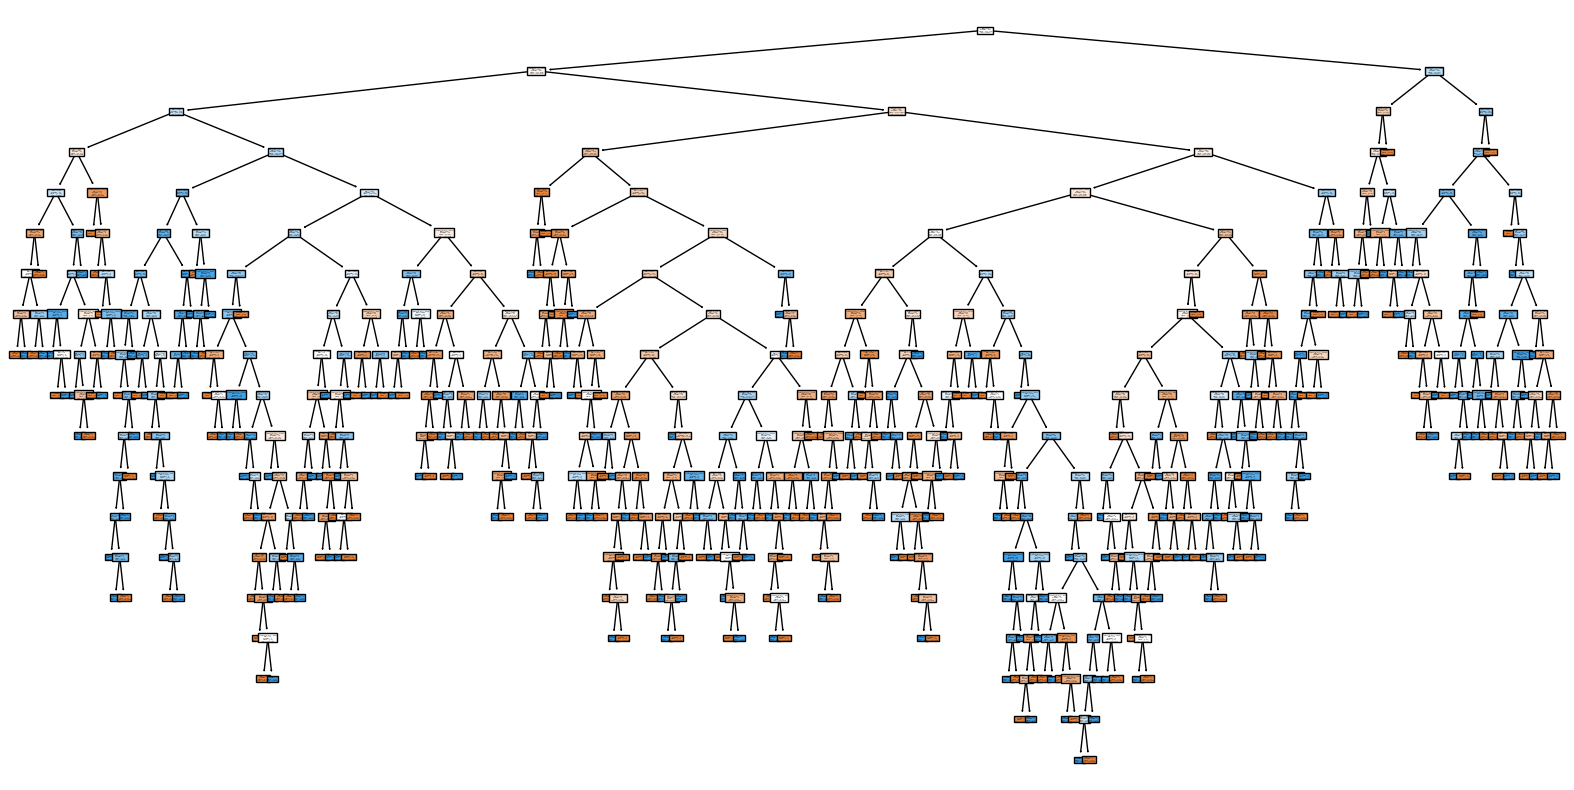

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=["Not Placed", "Placed"], filled=True)
plt.show()
plt.savefig("analysis/random_forest_tree.png", dpi=300, bbox_inches='tight')


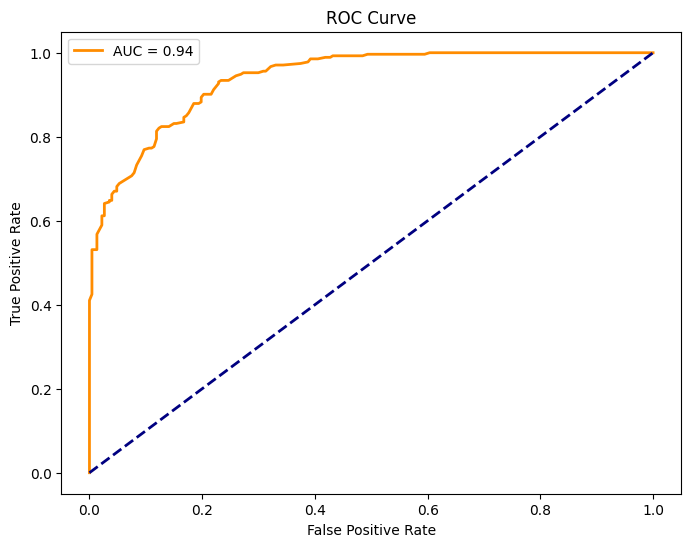

In [ ]:
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("analysis/roc_curve.png", dpi=300)


In [43]:



# Save your trained model
joblib.dump(model, 'models/placement_predictor.pkl')
joblib.dump(le,"models/gender_encoder.pk1")
joblib.dump(le2,"models/branch_encoder.pk1")
joblib.dump(le3,"models/internship_done_encoder.pk1")
joblib.dump(le4,"models/clubs_encoder.pk1")


['models/clubs_encoder.pk1']